<font size ="5">Imports<font>

In [1]:
#data processing
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import utils
from efficient_apriori import apriori
import warnings
warnings.filterwarnings("ignore")

<font size ="4">Configuration<font>

In [2]:
support = 0.009
confidence = 0.6
lift = 1

<font size ="4">Loading the CSV dataset - Groceries_dataset<font>

In [3]:
dataset_path = "datasets/Groceries_dataset.csv"
df = pd.read_csv(dataset_path)
df['itemDescription'] = df['itemDescription'].str.strip()
df['itemDescription'] = df['itemDescription'].str.lower()

<font size ="4">Display database<font>

In [4]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


drop duplicates:

In [5]:
df = df.drop_duplicates()
df = df.dropna()
len(df)

38006

In [6]:
utils.display_data(df)

dataset information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


Verify if there are any null values:

Member_number      0
Date               0
itemDescription    0
dtype: int64


<font size="4">top 10 sold items:</font>

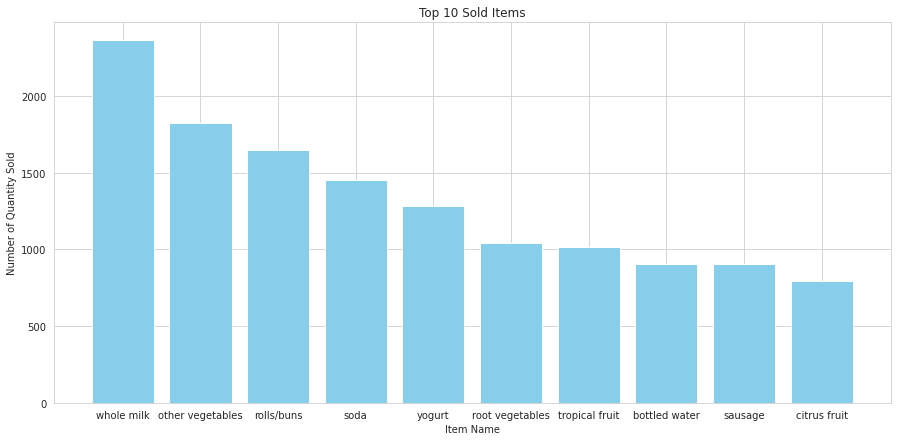

In [7]:
utils.top_ten_sold_items(df)

<font size="4">Using Apriori on a DataFrame:</font>

In [8]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer

In [9]:
# Rules mining process:
itemsets, rules = apriori(transactions, min_support=support, min_confidence=confidence,
                                          output_transaction_ids=False)

In [10]:
attrs = [a for a in dir(rules[0]) if not a.startswith("_")]
rules_rec = []
for r in rules:
    rdict={}
    for a in attrs:
        rdict[a]=getattr(r,a)
        rdict["rule"]=str(r).split("} (")[0]+"}"
        rdict["len_l"]=len(r.lhs)
        rdict["len_r"]=len(r.rhs)
    rules_rec.append(rdict)

In [11]:
rules_df = pd.DataFrame(rules_rec)
rules_df.set_index('rule',inplace=True)
rules_df = rules_df[['len_l', 'len_r','count_lhs','count_rhs','support','confidence','lift','rpf','conviction','lhs','rhs']]

The rules without making the division are:

In [12]:
rules_df

,len_l,len_r,count_lhs,count_rhs,support,confidence,lift,rpf,conviction,lhs,rhs
rule,,,,,,,,,,,
{liquor} -> {whole milk},1,1,103,1786,0.016675,0.631068,1.377325,0.010523,1.468607,"(liquor,)","(whole milk,)"
{mustard} -> {whole milk},1,1,91,1786,0.014110,0.604396,1.319112,0.008528,1.369591,"(mustard,)","(whole milk,)"
{zwieback} -> {whole milk},1,1,60,1786,0.009236,0.600000,1.309518,0.005541,1.354541,"(zwieback,)","(whole milk,)"
"{beef, bottled beer} -> {whole milk}",2,1,81,1786,0.013084,0.629630,1.374186,0.008238,1.462904,"(beef, bottled beer)","(whole milk,)"
"{beef, canned beer} -> {whole milk}",2,1,73,1786,0.012314,0.657534,1.435089,0.008097,1.582104,"(beef, canned beer)","(whole milk,)"
...,...,...,...,...,...,...,...,...,...,...,...
"{other vegetables, rolls/buns, shopping bags, yogurt} -> {whole milk}",4,1,55,1786,0.010005,0.709091,1.547613,0.007095,1.862494,"(other vegetables, rolls/buns, shopping bags, ...","(whole milk,)"
"{other vegetables, rolls/buns, soda, yogurt} -> {whole milk}",4,1,78,1786,0.013597,0.679487,1.483002,0.009239,1.690467,"(other vegetables, rolls/buns, soda, yogurt)","(whole milk,)"
"{other vegetables, rolls/buns, tropical fruit, yogurt} -> {whole milk}",4,1,58,1786,0.009749,0.655172,1.429934,0.006387,1.571267,"(other vegetables, rolls/buns, tropical fruit,...","(whole milk,)"


Split the data:

In [13]:
train, test = utils.train_test(df)

In [14]:
train

,Member_number,Date,itemDescription
25800,4851,08-11-2014,grapes
1071,4434,21-09-2015,beef
30380,3584,29-05-2014,soft cheese
12316,3141,04-01-2014,frozen vegetables
4348,3363,18-05-2015,canned beer
...,...,...,...
3109,3614,28-04-2015,tropical fruit
10153,1061,17-03-2014,soda
10246,2626,09-08-2014,whole milk
27605,4759,24-01-2014,root vegetables


In [15]:
test

,Member_number,Date,itemDescription
19023,1567,11-04-2015,bottled water
12985,3589,04-03-2014,other vegetables
14320,2760,19-04-2014,long life bakery product
1996,1458,24-02-2015,ice cream
20516,4873,27-04-2015,hard cheese
...,...,...,...
22776,1339,05-05-2015,whole milk
8733,2832,29-07-2014,sausage
4600,4744,28-10-2015,citrus fruit
38571,2060,25-05-2014,brown bread


In [16]:
# Save original data
original_data = df.copy()
products = df['itemDescription'].unique()
# One-hot representation of products purchased
data = utils.one_hot(df,'itemDescription')
# If a customer bought multiple items in one day, it will be considered as one record
records = utils.build_records(data,'Member_number','Date' ,products)
# Convert all of our numbers to either a 1 or a 0 (negative numbers are converted to zero, positive numbers are converted to 1)
records = utils.convert_numbers_to_one_or_zero(records)

In [17]:
# Find frequent itemsets with Apriori algorithm
frequent_itemsets, rules = utils.frequent_itemsets_and_association_rules(records,support)
len(frequent_itemsets)

73

In [18]:
len(rules)

12

In [19]:
# Save original data
original_data = train.copy()
products = train['itemDescription'].unique()
# One-hot representation of products purchased
data = utils.one_hot(train,'itemDescription')
# If a customer bought multiple items in one day, it will be considered as one record
records = utils.build_records(data,'Member_number','Date' ,products)
# Convert all of our numbers to either a 1 or a 0 (negative numbers are converted to zero, positive numbers are converted to 1)
records = utils.convert_numbers_to_one_or_zero(records)

In [20]:
frequent_itemsets_train, rules_train = utils.frequent_itemsets_and_association_rules(records,support)
len(frequent_itemsets_train)

62

In [21]:
len(rules)

12

In [22]:
# Apply the association rules to the test set
rules_test = pd.DataFrame(columns=rules_train.columns)
for index, row in test.iterrows():
    for rule_index, rule_row in rules_train.iterrows():
        if set(rule_row['antecedents']).issubset(row) and not set(rule_row['consequents']).issubset(row):
            rules_test = rules_test.append(rule_row, ignore_index=True)

In [23]:
len(rules_test)

1718

In [24]:
# Calculate the precision, recall, and F1 score for the test set
precision = len(rules_test) / len(rules)
recall = len(rules_test) / len(test)
f1_score = 2 * precision * recall / (precision + recall)

In [25]:
# Print the results
print('Apriori algorithm on entire dataset:')
print('Number of rules:', len(rules))
print('Apriori algorithm on training set:')
print('Number of rules:', len(rules_train))
print('Performance on test set:')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

Apriori algorithm on entire dataset:
Number of rules: 12
Apriori algorithm on training set:
Number of rules: 4
Performance on test set:
Precision: 143.16666666666666
Recall: 0.22599315969481715
F1 score: 0.4512739690044654


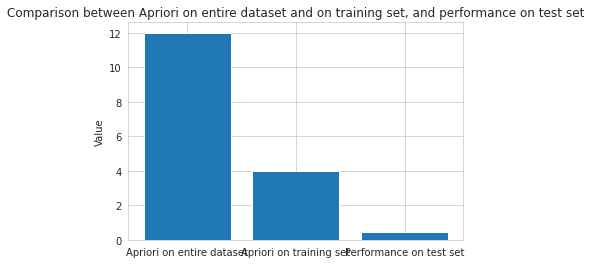

In [26]:
# Plot the results
labels = ['Apriori on entire dataset', 'Apriori on training set', 'Performance on test set']
values = [len(rules), len(rules_train), f1_score]
utils.plot_results(labels, values)